## Preprocessing

In [21]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Set DPI of all Plots
plt.rcParams["figure.dpi"] = 150

# Set Dark Grid for all Plots
sns.set_style('darkgrid')

# #  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [22]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [23]:
# OPTIMISATION: drop extra column in an attempt to increase Accuracy of model
application_df = application_df.drop(columns=['STATUS'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1


In [24]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [25]:
# Look at APPLICATION_TYPE value counts for binning
app_types = application_df['APPLICATION_TYPE'].value_counts()
app_types

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [26]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_types[app_types < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [27]:
# Look at CLASSIFICATION value counts for binning
classification_types = application_df['CLASSIFICATION'].value_counts()
classification_types

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [28]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_types[classification_types > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [29]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_types[classification_types < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [30]:
# Convert categorical data to numeric with `pd.get_dummies`
encoded_application_df = pd.get_dummies(application_df)
encoded_application_df

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,108590,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,5000,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6692,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,142590,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,5000,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,5000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,5000,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [31]:
# Split our preprocessed data into our features and target arrays
y = encoded_application_df['IS_SUCCESSFUL'].values
X = encoded_application_df.drop(columns=['IS_SUCCESSFUL']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [32]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer_1 = 80
hidden_nodes_layer_2 = 55
hidden_nodes_layer_3 = 30

nn_model_3 = tf.keras.models.Sequential()

# First hidden layer
nn_model_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer_1, activation='relu', input_dim=number_input_features))

# OPTIMISATION: extra hidden layer (Second)
nn_model_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer_2, activation='relu'))

# Third hidden layer
nn_model_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer_3, activation='relu'))

# Output layer
nn_model_3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 80)                3440      
                                                                 
 dense_5 (Dense)             (None, 55)                4455      
                                                                 
 dense_6 (Dense)             (None, 30)                1680      
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 9606 (37.52 KB)
Trainable params: 9606 (37.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Compile the model
nn_model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
# Train the model
fit_model_3 = nn_model_3.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100


804/804 [==============================] - 1s 693us/step - loss: 0.5706 - accuracy: 0.7218
Epoch 2/100
804/804 [==============================] - 1s 731us/step - loss: 0.5546 - accuracy: 0.7286
Epoch 3/100
804/804 [==============================] - 1s 773us/step - loss: 0.5520 - accuracy: 0.7308
Epoch 4/100
804/804 [==============================] - 1s 762us/step - loss: 0.5503 - accuracy: 0.7320
Epoch 5/100
804/804 [==============================] - 1s 777us/step - loss: 0.5487 - accuracy: 0.7323
Epoch 6/100
804/804 [==============================] - 1s 771us/step - loss: 0.5482 - accuracy: 0.7336
Epoch 7/100
804/804 [==============================] - 1s 783us/step - loss: 0.5476 - accuracy: 0.7331
Epoch 8/100
804/804 [==============================] - 1s 767us/step - loss: 0.5464 - accuracy: 0.7345
Epoch 9/100
804/804 [==============================] - 1s 777us/step - loss: 0.5461 - accuracy: 0.7347
Epoch 10/100
804/804 [==============================] - 1s 825us/step - loss: 0.5457 

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5673 - accuracy: 0.7287 - 163ms/epoch - 608us/step
Loss: 0.5673098564147949, Accuracy: 0.7287463545799255


In [37]:
# Create DataFrame containing training history for Visualisation
nn_model_3_history_df = pd.DataFrame(fit_model_3.history)

# Set index name to 'epoch'
nn_model_3_history_df.index.set_names('epoch', inplace=True)

# Show DataFrame
nn_model_3_history_df

,loss,accuracy
epoch,,
0,0.570590,0.721777
1,0.554607,0.728580
2,0.551991,0.730796
3,0.550270,0.732040
4,0.548738,0.732312
...,...,...
95,0.533503,0.740554
96,0.533267,0.740204
97,0.533493,0.740476


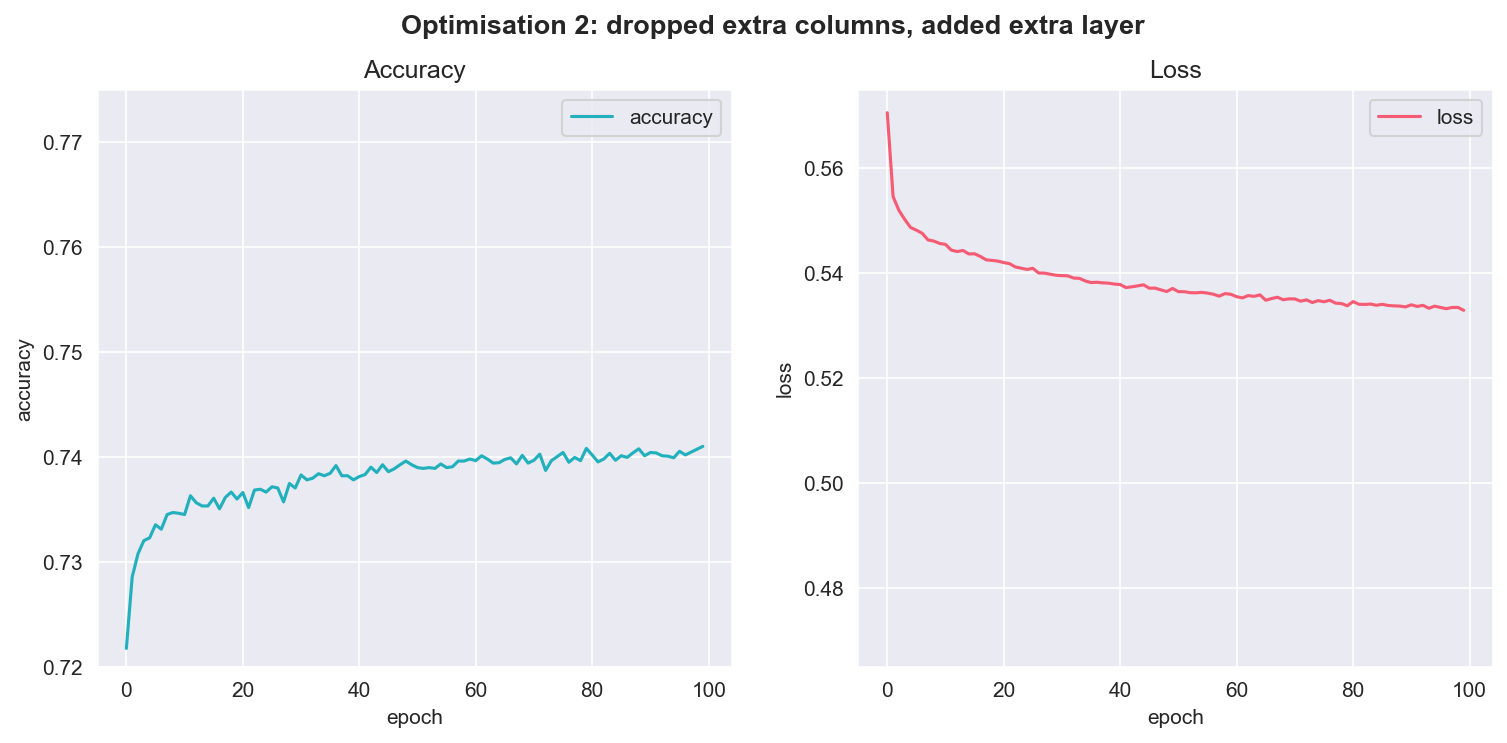

In [38]:
# Composite plot of Model 1 Accuracy and Loss
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Min and Max y-axis values for Accuracy
y_min_acc = 0.72
y_max_acc = 0.775

# Min and Max y-axis values for Loss
y_min_loss = 0.465
y_max_loss = 0.575

# Define Accuracy subplot (left plot)
ax[0].plot(nn_model_3_history_df.index, nn_model_3_history_df['accuracy'], '#23b0bd', label='accuracy')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('accuracy')
ax[0].set_title("Accuracy")
ax[0].set_ylim(y_min_acc, y_max_acc)
ax[0].legend()

# Define Loss subplot (right plot)
ax[1].plot(nn_model_3_history_df.index, nn_model_3_history_df['loss'], '#f65b74', label='loss')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].set_title("Loss")
ax[1].set_ylim(y_min_loss, y_max_loss)
ax[1].legend()

# Set main title (super title)
plt.suptitle("Optimisation 2: dropped extra columns, added extra layer", fontsize=13, fontweight='bold')

# Show figure
plt.show()

In [39]:
# Export our model to HDF5 file
nn_model_3.save("HDF5_files/AlphabetSoupCharity_Optimisation_2.h5")

/Users/samuelpalframan/anaconda3/envs/BootCamp/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
# Export History DataFrame to CSV
nn_model_3_history_df.to_csv('Resources/optimisation_2.csv', index=True, header=True)